# Malware Analysis using Machine Learning

In [1]:
#Credit:https://github.com/aayuv17/Malware-Analysis   

In [3]:
#The classification algorithms: Gaussian Naive Bayes, RandomForestClassifier, DecisionTreeClassifier & Linear SVC.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('PEFiles.csv', sep=',')

In [8]:
data.head()

,MD5Hash,FileType,SizeOfData,VirtualAddress,Entropy,Magic,NumberOfSections,TimeDateStamp,SizeOfOptionalHeader,Characteristics,...,SuspiciousImportFunctions,SuspiciousNameSection,SectionsLength,SectionMinEntropy,SectionMaxEntropy,SectionMinRawsize,SectionMaxRawsize,SectionMinVirtualsize,SectionMaxVirtualsize,Malware
0,393ced54d952c843ac9e16354bff642b,Win32 DLL,22568,4096,6.675504,267,3,1433141554,224,271,...,2,0,3,0.000000,0,0,0,4096,0,0
1,dac3e271ef4a287821becda51aa12946,Win32 DLL,21032,4096,6.429311,267,4,1309982321,224,8462,...,1,0,4,0.424357,0,512,0,52,0,0
2,eb3aeb684858b00bc6a90f68e8df5484,Win32 DLL,21544,4096,6.709396,267,5,1260053446,224,271,...,0,0,5,0.000000,0,0,0,4496,0,0
3,4fc1d0fdb7b881793ded358f1880bc16,Win32 DLL,20520,4096,6.585726,523,8,1236385374,240,34,...,1,0,8,0.259963,0,512,0,56,0,0
4,75e626c3ebf160ebe75c59d3d6ac3739,Win32 DLL,21544,4096,6.591178,267,3,1404722825,224,258,...,1,0,3,0.293594,0,512,0,512,0,0


In [81]:
data.shape

(480, 38)

In [82]:
data.isnull().sum()

MD5Hash                        0
FileType                       0
SizeOfData                     0
VirtualAddress                 0
Entropy                        0
Magic                          0
NumberOfSections               0
TimeDateStamp                  0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
ImageBase                      0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfHeaders                  0
SizeOfImage                    0
Subsystem                      0
DllCharacteristics             0
SuspiciousImportFunctions      0
SuspiciousNameSection          0
SectionsLe

In [83]:
data["Malware"].value_counts()

1    252
0    228
Name: Malware, dtype: int64

C:\Users\CICI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


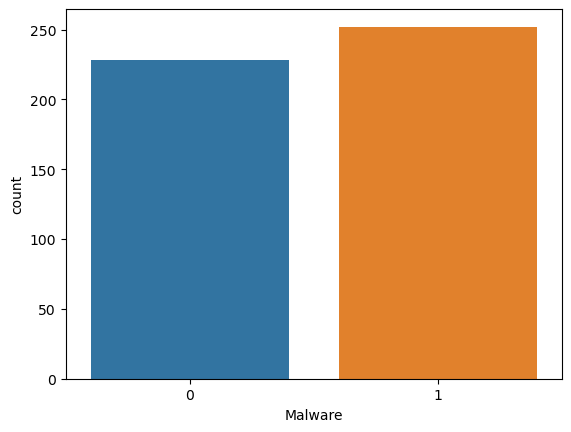

In [84]:
sns.countplot(data["Malware"])
plt.show()

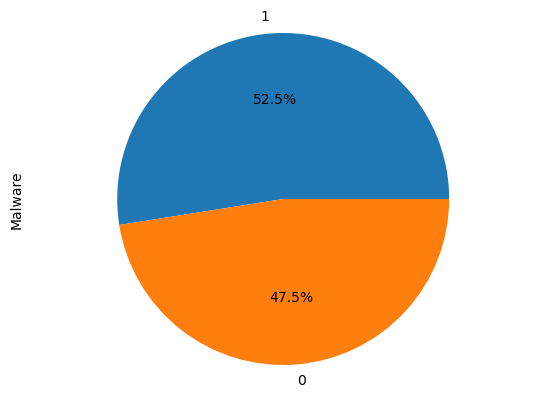

In [85]:
data["Malware"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [86]:
data["FileType"].value_counts()

Win32 EXE            223
Win32 DLL            168
unknown               21
DOS EXE               19
GIF                   11
MS Word Document       7
unknown                7
Windows Installer      6
DOS COM                6
Text                   5
HTML                   4
Email                  1
ZIP                    1
PDF                    1
Name: FileType, dtype: int64

In [87]:
data['FileType'] = data.FileType.map({'Win32 EXE':0, 'Win32 DLL':1, 'DOS EXE':2, 'GIF':3, 'MS Word Document':4, 'Windows Installer':5, 'DOS COM':6, 'Text':7, 'HTML':8})

In [88]:
Data=data.dropna(how="any",axis=0)
Data.head()

,MD5Hash,FileType,SizeOfData,VirtualAddress,Entropy,Magic,NumberOfSections,TimeDateStamp,SizeOfOptionalHeader,Characteristics,...,SuspiciousImportFunctions,SuspiciousNameSection,SectionsLength,SectionMinEntropy,SectionMaxEntropy,SectionMinRawsize,SectionMaxRawsize,SectionMinVirtualsize,SectionMaxVirtualsize,Malware
0,393ced54d952c843ac9e16354bff642b,1.0,22568,4096,6.675504,267,3,1433141554,224,271,...,2,0,3,0.000000,0,0,0,4096,0,0
1,dac3e271ef4a287821becda51aa12946,1.0,21032,4096,6.429311,267,4,1309982321,224,8462,...,1,0,4,0.424357,0,512,0,52,0,0
2,eb3aeb684858b00bc6a90f68e8df5484,1.0,21544,4096,6.709396,267,5,1260053446,224,271,...,0,0,5,0.000000,0,0,0,4496,0,0
3,4fc1d0fdb7b881793ded358f1880bc16,1.0,20520,4096,6.585726,523,8,1236385374,240,34,...,1,0,8,0.259963,0,512,0,56,0,0
4,75e626c3ebf160ebe75c59d3d6ac3739,1.0,21544,4096,6.591178,267,3,1404722825,224,258,...,1,0,3,0.293594,0,512,0,512,0,0


In [89]:
X = Data.drop(['MD5Hash','Malware'],axis=1)
Y = Data['Malware']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=1)
X_train.head()

,FileType,SizeOfData,VirtualAddress,Entropy,Magic,NumberOfSections,TimeDateStamp,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,...,DllCharacteristics,SuspiciousImportFunctions,SuspiciousNameSection,SectionsLength,SectionMinEntropy,SectionMaxEntropy,SectionMinRawsize,SectionMaxRawsize,SectionMinVirtualsize,SectionMaxVirtualsize
368,0.0,21504,4096,6.529624,267,4,1387178030,224,259,8,...,0,0,0,4,0.572732,0,4096,0,1504,0
476,0.0,31744,4096,6.261564,523,5,1263781114,240,558,6,...,33088,0,0,5,0.020393,0,512,0,8,0
217,1.0,5632,4096,6.541042,267,7,1438964804,224,258,12,...,33088,5,0,7,4.678197,0,6656,0,6568,0
80,1.0,63528,4096,6.497885,267,4,596991535,224,271,6,...,0,1,0,4,0.000000,0,0,0,13352,0
46,0.0,20520,4096,6.455427,267,3,1435013409,224,258,11,...,34112,0,0,3,0.101910,0,512,0,12,0


In [91]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [92]:
#performing Gaussian Naive Bayes on the training data
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [93]:
gnb.fit(X_scaled, Y_train)

GaussianNB()

In [94]:
Y_pred=gnb.predict(X_test)

C:\Users\CICI\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [95]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 37.77777777777778


In [96]:
#accuracy is quite low using Naive Bayes algorithm.
#creating new dataframe to implement Random Forest Classifier
X_new = pd.DataFrame(X_scaled, columns=X.columns)
X_new.head()

,FileType,SizeOfData,VirtualAddress,Entropy,Magic,NumberOfSections,TimeDateStamp,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,...,DllCharacteristics,SuspiciousImportFunctions,SuspiciousNameSection,SectionsLength,SectionMinEntropy,SectionMaxEntropy,SectionMinRawsize,SectionMaxRawsize,SectionMinVirtualsize,SectionMaxVirtualsize
0,-0.603320,-0.104473,-0.084954,0.150231,-0.255503,-0.610592,0.503612,-0.255503,-0.431477,0.026879,...,-1.314629,-0.873110,-0.121952,-0.610592,-0.484881,0.0,-0.047476,0.0,-0.374542,0.0
1,-0.603320,-0.103222,-0.084954,-0.197718,3.913845,-0.081117,0.058121,3.913845,-0.404390,-0.359098,...,0.760157,-0.873110,-0.121952,-0.081117,-0.771911,0.0,-0.291610,0.0,-0.458567,0.0
2,0.067243,-0.106412,-0.084954,0.165052,-0.255503,0.977831,0.690574,-0.255503,-0.431568,0.798831,...,0.760157,-0.204781,-0.121952,0.977831,1.648577,0.0,0.126905,0.0,-0.090113,0.0
3,0.067243,-0.099339,-0.084954,0.109033,-0.255503,-0.610592,-2.349141,-0.255503,-0.430390,-0.359098,...,-1.314629,-0.739444,-0.121952,-0.610592,-0.782509,0.0,-0.326486,0.0,0.290922,0.0
4,-0.603320,-0.104593,-0.084954,0.053922,-0.255503,-1.140066,0.676308,-0.255503,-0.431568,0.605843,...,0.824367,-0.873110,-0.121952,-1.140066,-0.729550,0.0,-0.291610,0.0,-0.458342,0.0


In [97]:
#using Principal Component Analysis to increase interpretability
from sklearn.decomposition import PCA
skpca = PCA(n_components=36)
X_pca = skpca.fit_transform(X_new)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

Variance sum :  1.0


In [98]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
model = RFC(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16, 
                         max_features = 'sqrt')
model.fit(X_pca, Y_train)

X_test_scaled = scaler.transform(X_test)
X_test_new = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_pca = skpca.transform(X_test_new)

Y_pred = model.predict(X_test_pca)
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.62      0.45      0.52        47
           1       0.54      0.70      0.61        43

    accuracy                           0.57        90
   macro avg       0.58      0.57      0.56        90
weighted avg       0.58      0.57      0.56        90



In [100]:
print("Random Forest model accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

Random Forest model accuracy(in %): 56.666666666666664


<AxesSubplot:>

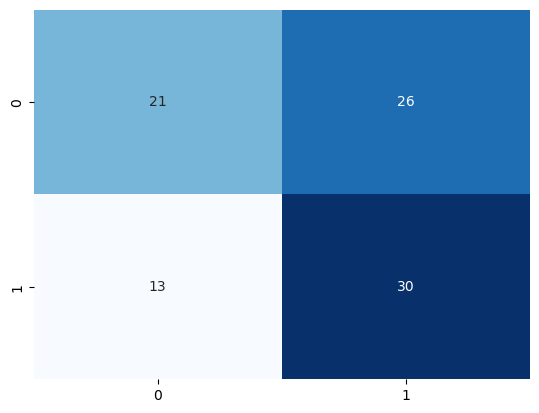

In [101]:
sns.heatmap(confusion_matrix(Y_pred, Y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)

In [102]:
#accuracy of 97% is obtained using Random Forest Classifier
#trying DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_scaled,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)*100)

Accuracy: 37.77777777777778


C:\Users\CICI\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [103]:
print("Decision Tree Classifier accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

Decision Tree Classifier accuracy(in %): 37.77777777777778


In [104]:
#accuracy of 37.78%
#using Linear SVC Classifier
#scaling initial data again
X_scaled=scaler.fit_transform(X)
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict

svm=SVC(kernel="linear")
Y_pred = cross_val_predict(svm, X_scaled, Y, cv=10)
conf_mat = confusion_matrix(Y, Y_pred)
print(conf_mat)

[[105 116]
 [118 110]]


In [105]:
print("Linear SVC Classifier accuracy(in %):", metrics.accuracy_score(Y, Y_pred)*100)

Linear SVC Classifier accuracy(in %): 47.88418708240535
